# Checagem de fatos

Notebook para checagem de fatos e dados do projeto [Territórios de Exceção](https://documental.xyz/intervencao)

In [1]:
### Setup
# !pip install -U pandas pandas-profiling
import pandas as pd
# from pandas_profiling import ProfileReport

In [4]:
## Read the CSV
df = pd.read_csv('../dados/op_helicopteros/op-helicopteros.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            736 non-null    object
 1   disparo         736 non-null    int64 
 2   cidade          736 non-null    object
 3   bairro          631 non-null    object
 4   cod_bairro      552 non-null    object
 5   local           418 non-null    object
 6   outras_regioes  157 non-null    object
 7   fonte           736 non-null    object
 8   fonte2          116 non-null    object
 9   tipo_operacao   736 non-null    object
 10  media_fonte     93 non-null     object
 11  media_link      94 non-null     object
 12  presenca_civil  170 non-null    object
 13  presenca_pmerj  362 non-null    object
 14  presenca_uniao  6 non-null      object
dtypes: int64(1), object(14)
memory usage: 86.4+ KB


In [ ]:
## Fixing datatypes
df['data'] = pd.to_datetime(df['data']) 
df['disparo'] = df['disparo'].astype('bool') 
df['cod_bairro'] = df['cod_bairro'].astype('str') 

df.info()

In [2]:
# Statistical summary
# ProfileReport(df, title='Territórios de exceção',html={'style':{'full_width':True}}).to_notebook_iframe()

In [ ]:
### Annalysis
# Total of police operations w/ helicopters between 2018 and 2019

df_scope = df[
    (df['data'] >= '2018-01-01') & 
    (df['data'] <= '2019-12-31') &
    (df['cidade'] == 'Rio de Janeiro') & 
    # Remove all entries from Twitter with no neighbourhood identified
    ~((df['cod_bairro'] == 'ND') & (df['fonte'] == 'Twitter'))
            ]

fact_1 = 'Nos anos de 2018 e 2019, identificamos ' + str(len(df_scope)) +  ' utilizações de aeronaves pelas forças policiais na cidade do Rio de Janeiro'

print(fact_1)

In [ ]:
## Within that scope, the total with clues of shootings from official helicopters

df_scope_shooting = df_scope[(df_scope['disparo'] == 1)]

fact_2 = 'Em ' +  str(len(df_scope_shooting)) + ' casos encontramos indícios de disparos a partir dos helicópteros.'

print(fact_2)

In [9]:
# Top neighbourhoods w/ helicopter shootings
df_scope_shooting.groupby("bairro")["data"].count().sort_values(ascending=False).head(5)

bairro
Maré                  8
Cidade de Deus        7
Senador Camará        5
Complexo do Alemão    4
Manguinhos            4
Name: data, dtype: int64

In [10]:
## Com base nos dados coletados, identificamos 415 ocasiões nos quais os helicópteros da
## Polícia Civil ou Militar do Rio de Janeiro foram utilizados entre 2018 e 2019. 
## O Complexo da Maré é o bairro com mais registros (35), seguido da Cidade de Deus (32). 
df_scope.groupby("bairro")["data"].count().sort_values(ascending=False).head(5)

bairro
Maré                  35
Cidade de Deus        32
Praça Seca            24
Rocinha               17
Complexo do Alemão    16
Name: data, dtype: int64

In [67]:
## De um total de X operações da Polícia Civil entre 2017 e 2019 com horário de início e término identificados
## X delas (X%) começaram antes do meio-dia e X (X%) antes das 07h da manhã

lai = pd.read_csv('../dados/op_helicopteros/lai/lai3075.csv')

lai["hora_comeco"] = pd.to_datetime(lai["HORA_INICIO"])

fact_3 = 'De um total de ' + str(len(lai)) + ' operações da Polícia Civil entre 2017 e 2019 com horário de início e término identificados, '

print(fact_3)

De um total de 84 operações da Polícia Civil entre 2017 e 2019 com horário de início e término identificados, 


In [68]:
## 40 delas (72%) ocorreram antes do meio-dia e 20 (36%) antes das 07h da manhã

total_up_12pm = len(lai[(lai.hora_comeco <= '11:59:00')])
total_up_7am = len(lai[(lai.hora_comeco <= '06:59:00')])

total_up_12pm_percent = round((total_up_12pm/len(lai))*100)
total_up_7am_percent = round((total_up_7am/len(lai))*100)

fact_4 = str(total_up_12pm) +' delas ('+ str(total_up_12pm_percent) +'%) ocorreram antes do meio-dia e ' + str(total_up_7am) + ' ('+ str(total_up_7am_percent) +'%) antes das 07h da manhã'

print(fact_3 + fact_4)

De um total de 84 operações da Polícia Civil entre 2017 e 2019 com horário de início e término identificados, 49 delas (58%) ocorreram antes do meio-dia e 24 (29%) antes das 07h da manhã


In [74]:
### Import datasets from Fogo Cruzado and PistaNews
fcruzado = pd.read_csv('dados/FogoCruzado18-19-250706.csv')

fcruzado.dtypes

id_ocorrencia                         int64
local_ocorrencia                     object
latitude_ocorrencia                 float64
longitude_ocorrencia                float64
data_ocorrencia                      object
hora_ocorrencia                      object
presen_agen_segur_ocorrencia          int64
qtd_morto_civil_ocorrencia            int64
qtd_morto_agen_segur_ocorrencia       int64
qtd_ferido_civil_ocorrencia           int64
qtd_ferido_agen_segur_ocorrencia      int64
fonte_ocorrencia                      int64
estado_id                             int64
cidade_id                             int64
nome_cidade                          object
cod_ibge_cidade                       int64
gentilico_cidade                     object
populacao_cidade                      int64
area_cidade                           int64
densidade_demo_cidade               float64
nome_estado                          object
uf_estado                            object
cod_ibge_estado                 

In [75]:
fcruzado['data_ocorrencia'] =  pd.to_datetime(fcruzado['data_ocorrencia']) 

fcruzado = fcruzado[(fcruzado['data_ocorrencia'] >= '2018-01-01') 
                    & (fcruzado['data_ocorrencia'] <= '2019-12-31') & 
                    (fcruzado['presen_agen_segur_ocorrencia'] == 1)]

In [76]:
# Import data about territorial dominance (PistaNews)

import geopandas as gpd

faccoes = gpd.read_file('geodados/faccoes.geojson')

# faccoes.plot()

# faccoes.dtypes

<AxesSubplot:>

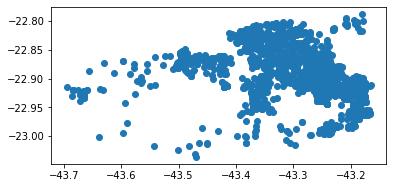

In [77]:
# Import data about shootings (FogoCruzado)

operacoes = gpd.GeoDataFrame(
    fcruzado, geometry=gpd.points_from_xy(fcruzado.longitude_ocorrencia, fcruzado.latitude_ocorrencia),crs="EPSG:4326")
operacoes.crs

len(operacoes)
operacoes.plot()

<AxesSubplot:>

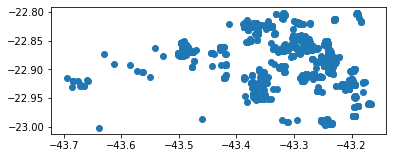

In [78]:
# Merge both geodata sources
opfaccoes = gpd.sjoin(operacoes, faccoes, how="inner", op='intersects')

# opfaccoes.dtypes

len(opfaccoes)
opfaccoes.plot()

In [79]:
total_operacoes = pd.DataFrame(opfaccoes.groupby("layer")["presen_agen_segur_ocorrencia"].
                               count().sort_values(ascending=False).head(5))

total_operacoes

,presen_agen_segur_ocorrencia
layer,
CV,1044
TCP,281
MIL,115
ADA,30


In [80]:
# Calculate area per squared kilometers
faccoes["area_por_km2"] = faccoes['geometry'].to_crs({'init': 'epsg:3395'})\
               .map(lambda p: p.area / 10**6)

total_faccoes = pd.DataFrame(faccoes.groupby("layer")["area_por_km2"].sum().sort_values(ascending=False).head(5))

faccoes.sort_values(by='area_por_km2',ascending=False).head(5)

/usr/lib/python3/dist-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Name,layer,geometry,area_por_km2
12,COMPLEXO DO ALEMÃO E PENHA,CV,"POLYGON ((-43.26613 -22.85561, -43.26770 -22.8...",12.849577
368,JESUÍTAS - SANTA CRUZ,MIL,"POLYGON ((-43.63308 -22.88074, -43.63477 -22.8...",12.261081
171,MILÍCIA POSSE/SANTÍSSIMO,MIL,"POLYGON ((-43.54437 -22.88827, -43.52330 -22.8...",10.421167
381,VARGEM GRANDE,MIL,"POLYGON ((-43.51385 -23.01198, -43.51291 -23.0...",9.313475
311,SEPETIBA,MIL,"POLYGON ((-43.70134 -22.95286, -43.70372 -22.9...",9.081099


In [81]:
## Em média, entre 2018 e 2019, foram identificadas 28 tiroteios com presença 
# de agentes oficiais por quilômetro quadrado em áreas do CV. 
## Em comparação, em áreas de milícia esta taxa foi de 0,6 por quilômetro quadrado. 

total_opfaccoes = pd.DataFrame.join(total_operacoes,total_faccoes)
total_opfaccoes['tiro_per_km2'] = round(total_opfaccoes['presen_agen_segur_ocorrencia']/
                                        total_opfaccoes['area_por_km2'],2)

total_opfaccoes

,presen_agen_segur_ocorrencia,area_por_km2,tiro_per_km2
layer,,,
CV,1044,45.751177,22.82
TCP,281,25.500297,11.02
MIL,115,211.098588,0.54
ADA,30,3.952409,7.59


# Homicídios decorrentes de intervenção policial

> Em 2018, foram 1.534 mortes em decorrência de intervenção de agentes do Estado. Em 2019, novos recordes: 1.814 mortes ao longo do ano - quase 5 pessoas por dia, em média. Destas vítimas, 78% são jovens, pretos e pardos. 

https://g1.globo.com/rj/rio-de-janeiro/noticia/2020/06/06/pretos-e-pardos-sao-78percent-dos-mortos-em-acoes-policiais-no-rj-em-2019-e-o-negro-que-sofre-essa-inseguranca-diz-mae-de-agatha.ghtml

https://g1.globo.com/rj/rio-de-janeiro/noticia/2019/09/11/rj-e-o-estado-onde-policia-mais-matou-em-2018.ghtml